<a href="https://colab.research.google.com/github/jonatangraversen01-lab/AI-in-Transport/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'
df = pd.read_csv(url)

#df = pd.read_csv('Exercise2BikeSharing.csv')
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df["hr_workingday"] = df["hr"] * df["workingday"]

target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr','hr_workingday'
]

X = df[features].copy()
y = df[target].astype(float)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (important for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

rmse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print({"LR_RMSE": rmse_lr, "LR_MAE": mae_lr, "LR_R2": r2_lr})

{'LR_RMSE': 19364.00865660521, 'LR_MAE': 104.6994619878074, 'LR_R2': 0.38848074794117016}


In [5]:
pip install scikeras

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 96.69499, saving model to weights.best.keras

Epoch 2: val_mae improved from 96.69499 to 86.17326, saving model to weights.best.keras

Epoch 3: val_mae improved from 86.17326 to 73.41694, saving model to weights.best.keras

Epoch 4: val_mae improved from 73.41694 to 67.13539, saving model to weights.best.keras

Epoch 5: val_mae improved from 67.13539 to 63.06212, saving model to weights.best.keras

Epoch 6: val_mae improved from 63.06212 to 59.23751, saving model to weights.best.keras

Epoch 7: val_mae improved from 59.23751 to 56.69242, saving model to weights.best.keras

Epoch 8: val_mae improved from 56.69242 to 53.62687, saving model to weights.best.keras

Epoch 9: val_mae improved from 53.62687 to 50.29642, saving model to weights.best.keras

Epoch 10: val_mae improved from 50.29642 to 49.38945, saving model to weights.best.keras

Epoch 11: val_mae improved from 49.38945 to 43.93514, saving model to weights.best.keras

Epoch 12: val_mae impro

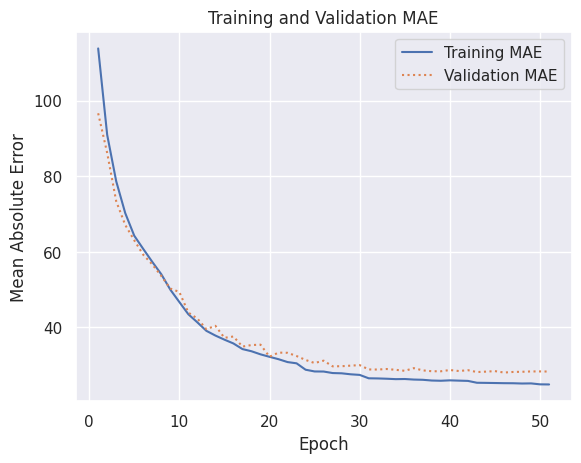

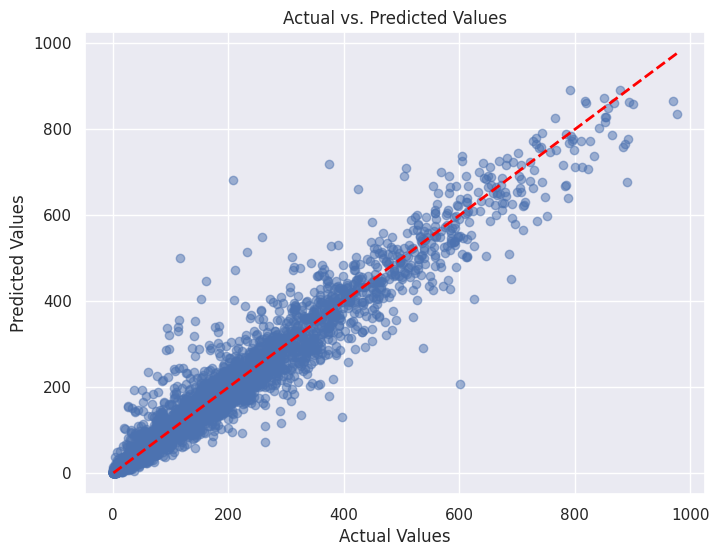

In [7]:
from json import load
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

#-------------------------------------------------data preprocessing------------------------------------------------------------------


#-------------------------------------------------network construction-----------------------------------------------------------------

#************************************************Here you can choose to add the dropout layer or not***************************
#
def construct_network_model():
#   # Create a Sequential model, which is a linear stack of layers.
   model = Sequential()
#
#   # Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
   model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
#
#   # # Add a Dropout layer with a dropout rate of 0.5.
   #model.add(Dropout(0.3))
   model.add(Dense(64, activation='relu'))
#   # Add another Dense layer with 64 units and ReLU activation.
   model.add(Dense(128, activation='relu'))
   model.add(Dense(64, activation='relu'))
#   # # Add another Dropout layer with a dropout rate of 0.5.
   #model.add(Dropout(0.3))


#
#   # Add a final Dense layer with 1 unit (typically used for regression tasks).
   model.add(Dense(1))
   return model
#
model=construct_network_model()
# # Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# # and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can choose to add the dropout layer or not*****************

#-------------------------------------------------model train------------------------------------------------------------------
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model will be saved.
filepath = "weights.best.keras"

# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save thhe model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist_2 = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)
#-------------------------------------------------model evaluation--------------------------------------------------------------------
# Set the style of the plots using Seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist_2.history['mae']
val_err = hist_2.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#-------------------------------------------------load model and evaluation--------------------------------------------------------------------
if not filepath =="":
  # Load a pre-trained model from the specified file path.
  model = load_model(filepath)

  # Use the loaded model to predict on the test data.
  y_pred = model.predict(X_test_scaled)

  # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")



  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()


In [8]:
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Set the style of the plots using seaborn.
sns.set()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the neural network model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


# Create a Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('--------------------------------------'+'this is result of the linear regression model'+"---------------------------------------------")
print(f"Mean Absolute Error of linear model: {mae_linear}")
print(f"Root Mean Squared Error of linear model: {rmse_linear}")
print(f"R-squared of linear model: {r2_linear}")

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 27.483766696948486
Root Mean Squared Error: 2086.5514633510707
R-squared: 0.9341062889984062
--------------------------------------this is result of the linear regression model---------------------------------------------
Mean Absolute Error of linear model: 104.6994619878074
Root Mean Squared Error of linear model: 19364.00865660521
R-squared of linear model: 0.38848074794117016


In [10]:
import pandas as pd
results = pd.DataFrame([
    {'Model': 'Linear Regression', 'RMSE': rmse_lr, 'MAE': mae_lr, 'R2': r2_lr},
    {'Model': 'Neural Net', 'RMSE': rmse, 'MAE': mae, 'R2': r2},
])
results

,Model,RMSE,MAE,R2
0,Linear Regression,19364.008657,104.699462,0.388481
1,Neural Net,2086.551463,27.483767,0.934106


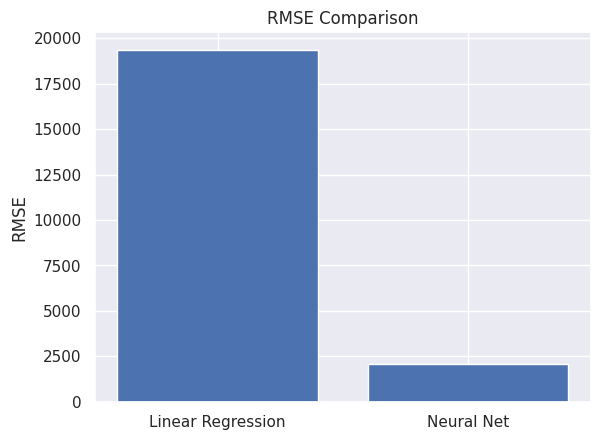

In [11]:
# Bar chart of RMSE
plt.figure()
plt.bar(results['Model'], results['RMSE'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.show()